In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()
pd.options.display.max_rows =999

In [2]:
data = pd.read_csv('ClusteringHSS.csv')
data

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0
...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0
1109,1110,Male,Urban,48.0,7.0
1110,1111,Male,Urban,31.0,16.0
1111,1112,Male,Urban,50.0,14.0


In [3]:
x = data[['Income','Spending']]
x.describe()
x.isnull().sum()
x = x.dropna(axis = 0)

In [4]:
kmeans =KMeans(12)
kmeans.fit(x)

KMeans(n_clusters=12)

In [5]:
x_pred = kmeans.fit_predict(x)
x['pred'] = x_pred

In [6]:
x

,Income,Spending,pred
0,20.0,15.0,5
1,5.0,12.0,1
2,28.0,18.0,9
3,40.0,10.0,4
4,42.0,9.0,4
...,...,...,...
1108,33.0,16.0,0
1109,48.0,7.0,8
1110,31.0,16.0,0
1111,50.0,14.0,2


Text(0, 0.5, 'Spending')

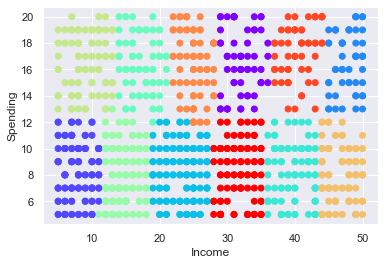

In [7]:
plt.scatter(x['Income'],x['Spending'], c =x['pred'], cmap= 'rainbow')
plt.xlabel('Income')
plt.ylabel('Spending')

##  Standardizing

In [8]:
from sklearn import preprocessing

In [9]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-4.49292043e-01,  8.11654189e-01, -1.21496839e-01],
       [-1.57082594e+00,  1.59252354e-01, -1.32499811e+00],
       [ 1.48859369e-01,  1.46405602e+00,  1.08200444e+00],
       ...,
       [ 3.73166149e-01,  1.02912147e+00, -1.62587343e+00],
       [ 1.79377575e+00,  5.94186910e-01, -1.02412280e+00],
       [-6.78483907e-04, -5.82149248e-02, -7.23247477e-01]])

##  Using the elbo method to determine to optimal number of clusters

In [10]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [11]:
number_of_cluster = range(1,10)

Text(0.5, 1.0, 'The Elbow Method')

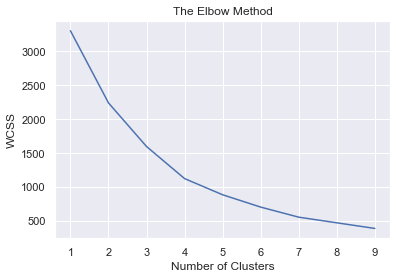

In [12]:
plt.plot(number_of_cluster,wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')